<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" height=300 width=300 />


# Final Project: League of Legends Match Predictor 


### Introduction  

League of Legends, a popular multiplayer online battle arena (MOBA) game, generates extensive data from matches, providing an excellent opportunity to apply machine learning techniques to real-world scenarios. Perform the following steps to build a logistic regression model aimed at predicting the outcomes of League of Legends matches.

Use the [league_of_legends_data_large.csv](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv) file to perform the tasks. 

### Step 1: Data Loading and Preprocessing  

#### Task 1: Load the League of Legends dataset and preprocess it for training.

Loading and preprocessing the dataset involves reading the data, splitting it into training and testing sets, and standardizing the features. You will utilize `pandas` for data manipulation, `train_test_split` from `sklearn` for data splitting, and `StandardScaler` for feature scaling.

Note: Please ensure all the required libraries are installed and imported.

1 .Load the dataset:
Use `pd.read_csv()` to load the dataset into a pandas DataFrame.
2. Split data into features and target: Separate win (target) and the remaining columns (features).
   X = data.drop('win', axis=1)
   y = data['win'] 
3 .Split the Data into Training and Testing Sets:
Use `train_test_split()` from `sklearn.model_selection` to divide the data. Set `test_size`=0.2 to allocate 20% for testing and 80% for training, and use `random_state`=42 to ensure reproducibility of the split.
4. Standardize the features:
Use `StandardScaler()` from sklearn.preprocessing to scale the features.
5. Convert to PyTorch tensors:
Use `torch.tensor()` to convert the data to PyTorch tensors.

#### Exercise 1:

Write a code to load the dataset, split it into training and testing sets, standardize the features, and convert the data into PyTorch tensors for use in training a PyTorch model.


### Setup
Installing required libraries:

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:


In [1]:
%%time
%pip install pandas scikit-learn matplotlib
%pip install torch==2.8.0+cpu torchvision==0.23.0+cpu torchaudio==2.8.0+cpu \
    --index-url https://download.pytorch.org/whl/cpu



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.1/184.1 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 34.5 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12
  Attempting uninstall: torch
    Found existing installation: torch 2.1.2
    Uninstalling torch-2.1.2:
      Successfully uninstalled torch-2.1.2
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.2
    Uninstalling torchvision-0.16.2:
      Successfully uninstalled torchvi

In [2]:
## Write your code here
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
data_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/rk7VDaPjMp1h5VXS-cUyMg/league-of-legends-data-large.csv'
data = pd.read_csv(data_path)

print("\nFirst 5 rows of the dataset:")
print(data.head())

# Step 2: Split into features (X) and target (y)
X = data.drop('win', axis=1)  # All columns except 'win' are features
y = data['win']               # 'win' is the target (match outcome)

# Step 3: Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,    # 20% for testing
    random_state=42   # Reproducible split
)

# Step 4: Standardize the features (fit on training data only to avoid data leakage)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit + transform training data
X_test_scaled = scaler.transform(X_test)        # Only transform test data

# Step 5: Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Add batch dimension
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Verify tensor shapes (optional, for sanity check)
print("\nTraining features shape:", X_train_tensor.shape)
print("Testing features shape:", X_test_tensor.shape)
print("Training target shape:", y_train_tensor.shape)
print("Testing target shape:", y_test_tensor.shape)


First 5 rows of the dataset:
   win  kills  deaths  assists  gold_earned   cs  wards_placed  wards_killed  \
0    0     16       6       19        17088  231            11             7   
1    1      8       8        5        14865  259            10             2   
2    0      0      17       11        15919  169            14             5   
3    0     19      11        1        11534  264            14             3   
4    0     12       7        6        18926  124            15             7   

   damage_dealt  
0         15367  
1         38332  
2         24642  
3         15789  
4         40268  

Training features shape: torch.Size([800, 8])
Testing features shape: torch.Size([200, 8])
Training target shape: torch.Size([800, 1])
Testing target shape: torch.Size([200, 1])


### Step 2: Logistic Regression Model  

#### Task 2: Implement a logistic regression model using PyTorch.  

Defining the logistic regression model involves specifying the input dimensions, the forward pass using the sigmoid activation function, and initializing the model, loss function, and optimizer.  

1 .Define the Logistic Regression Model:
  Create a class LogisticRegressionModel that inherits from torch.nn.Module.
 - In the `__init__()` method, define a linear layer (nn.Linear) to implement the logistic regression model.
- The `forward()` method should apply the sigmoid activation function to the output of the linear layer.

2.Initialize the Model, Loss Function, and Optimizer:
- Set input_dim: Use `X_train.shape[1]` to get the number of features from the training data (X_train).
- Initialize the model: Create an instance of the LogisticRegressionModel class  (e.g., `model = LogisticRegressionModel()`)while passing input_dim as a parameter
- Loss Function: Use `BCELoss()` from torch.nn (Binary Cross-Entropy Loss).
- Optimizer: Initialize the optimizer using `optim.SGD()` with a learning rate of 0.01

#### Exercise 2:  

Define the logistic regression model using PyTorch, specifying the input dimensions and the forward pass. Initialize the model, loss function, and optimizer.  


In [3]:
## Write your code here
import torch.nn as nn
import torch.optim as optim

class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        """
        Initialize the logistic regression model.
        Args:
            input_dim (int): Number of input features (columns in X_train)
        """
        super(LogisticRegression, self).__init__()
        # Linear layer: input_dim features → 1 output (probability of winning)
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        """
        Forward pass of the model (prediction step).
        Args:
            x (torch.Tensor): Input features tensor (shape: [batch_size, input_dim])
        Returns:
            torch.Tensor: Probability of the positive class (win=1) (shape: [batch_size, 1])
        """
        # Apply linear transformation → sigmoid activation (converts logits to probabilities)
        logits = self.linear(x)
        probabilities = torch.sigmoid(logits)
        return probabilities

# Initialize model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]  # Same as X_train.shape[1]

# Initialize the logistic regression model
model = LogisticRegression(input_dim)

# Define loss function (Binary Cross-Entropy Loss for binary classification)
criterion = nn.BCELoss()

# Define optimizer (Stochastic Gradient Descent with learning rate 0.01)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Verify model structure (optional)
print("Model architecture:", model)
print("Input dimension:", input_dim)
print("Loss function:", criterion)
print("Optimizer:", optimizer)

Model architecture: LogisticRegression(
  (linear): Linear(in_features=8, out_features=1, bias=True)
)
Input dimension: 8
Loss function: BCELoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


### Step 3: Model Training  

#### Task 3: Train the logistic regression model on the dataset.  

The training loop will run for a specified number of epochs. In each epoch, the model makes predictions, calculates the loss, performs backpropagation, and updates the model parameters.

1. Set Number of Epochs:  
   - Define the number of epochs for training to 1000.

2. Training Loop:  
   For each epoch:
   - Set the model to training mode using `model.train()`.
   - Zero the gradients using `optimizer.zero_grad()`.
   - Pass the training data (`X_train`) through the model to get the predictions (`outputs`).
   - Calculate the loss using the defined loss function (`criterion`).
   - Perform backpropagation with `loss.backward()`.
   - Update the model's weights using `optimizer.step()`.

3. Print Loss Every 100 Epochs:  
   - After every 100 epochs, print the current epoch number and the loss value.

4. Model Evaluation:  
   - Set the model to evaluation mode using `model.eval()`.
   - Use `torch.no_grad()` to ensure no gradients are calculated during evaluation.
   - Get predictions on both the training set (`X_train`) and the test set (`X_test`).

5. Calculate Accuracy:  
   - For both the training and test datasets, compute the accuracy by comparing the predicted values with the true values (`y_train`, `y_test`).
   - Use a threshold of 0.5 for classification
   
6. Print Accuracy:  
   - Print the training and test accuracies after the evaluation is complete.

#### Exercise 3:  

Write the code to train the logistic regression model on the dataset. Implement the training loop, making predictions, calculating the loss, performing backpropagation, and updating model parameters. Evaluate the model's accuracy on training and testing sets.  


In [4]:
# Write your code here
num_epochs = 1000  # Number of training epochs

# Training Loop:
# Store loss values (optional, for visualization later)
train_losses = []

for epoch in range(1, num_epochs + 1):
    # Set model to training mode (enables gradient computation)
    model.train()

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass: get predictions from training data
    outputs = model(X_train_tensor)

    # Calculate loss between predictions and true labels
    loss = criterion(outputs, y_train_tensor)

    # Backpropagation
    loss.backward()

    # Update model parameters 
    optimizer.step()

    # Store loss for tracking
    train_losses.append(loss.item())

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.7211
Epoch [200/1000], Loss: 0.7073
Epoch [300/1000], Loss: 0.6988
Epoch [400/1000], Loss: 0.6935
Epoch [500/1000], Loss: 0.6903
Epoch [600/1000], Loss: 0.6883
Epoch [700/1000], Loss: 0.6872
Epoch [800/1000], Loss: 0.6864
Epoch [900/1000], Loss: 0.6860
Epoch [1000/1000], Loss: 0.6857


In [5]:
# Model Evaluation: 
# Set model to evaluation mode
model.eval()

# Disable gradient calculation to speed up evaluation and save memory
with torch.no_grad():
    # Predict on training set
    y_train_pred = model(X_train_tensor)
    # Convert probabilities to binary predictions (threshold = 0.5)
    y_train_pred_class = (y_train_pred >= 0.5).float()
    # Calculate training accuracy
    train_accuracy = (y_train_pred_class == y_train_tensor).sum().item() / len(y_train_tensor)

    # Predict on test set
    y_test_pred = model(X_test_tensor)
    y_test_pred_class = (y_test_pred >= 0.5).float()
    # Calculate test accuracy
    test_accuracy = (y_test_pred_class == y_test_tensor).sum().item() / len(y_test_tensor)

# Print accuracy results
print(f"\nTraining Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")


Training Accuracy: 55.62%
Testing Accuracy: 51.00%


### Step 4: Model Optimization and Evaluation  

#### Task 4: Implement optimization techniques and evaluate the model's performance.  

Optimization techniques such as L2 regularization (Ridge Regression) help in preventing overfitting. The model is retrained with these optimizations, and its performance is evaluated on both training and testing sets. 

**Weight Decay** :In the context of machine learning and specifically in optimization algorithms, weight_decay is a parameter used to apply L2 regularization to the model's parameters (weights). It helps prevent the model from overfitting by penalizing large weight values, thereby encouraging the model to find simpler solutions.To use L2 regularization, you need to modify the optimizer by setting the weight_decay parameter. The weight_decay parameter in the optimizer adds the L2 regularization term during training.
For example, when you initialize the optimizer with optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01), the weight_decay=0.01 term applies L2 regularization with a strength of 0.01.

1. Set Up the Optimizer with L2 Regularization:
   - Modify the optimizer to include `weight_decay` for L2 regularization.
   - Example:
     ```python
     optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.01)
     ```
2. Train the Model with L2 Regularization:
    - Follow the same steps as before but use the updated optimizer with regularization during training.
    - Use epochs=1000
   
3. Evaluate the Optimized Model:
   - After training, evaluate the model on both the training and test datasets.
   - Compute the accuracy for both sets by comparing the model's predictions to the true labels (`y_train` and `y_test`).

4. Calculate and Print the Accuracy:
   - Use a threshold of 0.5 to determine whether the model's predictions are class 0 or class 1.
   - Print the training accuracy and test accuracy  after evaluation.


#### Exercise 4:  

Implement optimization techniques like L2 regularization and retrain the model. Evaluate the performance of the optimized model on both training and testing sets.  


In [6]:
## Write your code here
# Re-initialize the model (critical to start fresh, no pre-trained weights)
input_dim = X_train_tensor.shape[1]
model_reg = LogisticRegression(input_dim)  # New model instance

# Define optimizer with L2 Regularization (weight_decay = 0.01)
optimizer_reg = optim.SGD(model_reg.parameters(), lr=0.01, weight_decay=0.01)

# Define loss function (same BCELoss for binary classification)
criterion_reg = nn.BCELoss()

# Train the model with L2 regularization (1000 epochs)
num_epochs = 1000
train_losses_reg = []  # Track loss for regularized model

print("Training model with L2 Regularization (weight_decay=0.01)...")
for epoch in range(num_epochs):
    model_reg.train()  # Set to training mode
    optimizer_reg.zero_grad()  # Zero gradients
    
    # Forward pass
    y_train_pred_reg = model_reg(X_train_tensor)
    loss = criterion_reg(y_train_pred_reg, y_train_tensor)
    
    # Backpropagation and optimization
    loss.backward()
    optimizer_reg.step()
    
    # Track loss
    train_losses_reg.append(loss.item())
    
    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Training model with L2 Regularization (weight_decay=0.01)...
Epoch [100/1000], Loss: 0.7214
Epoch [200/1000], Loss: 0.7072
Epoch [300/1000], Loss: 0.6985
Epoch [400/1000], Loss: 0.6933
Epoch [500/1000], Loss: 0.6901
Epoch [600/1000], Loss: 0.6882
Epoch [700/1000], Loss: 0.6871
Epoch [800/1000], Loss: 0.6864
Epoch [900/1000], Loss: 0.6859
Epoch [1000/1000], Loss: 0.6857


In [7]:
# Evaluate the optimized model (no gradient computation)
model_reg.eval()
with torch.no_grad():
    # Evaluate on training set
    y_train_pred_reg = model_reg(X_train_tensor)
    y_train_pred_class_reg = (y_train_pred_reg >= 0.5).float()
    train_accuracy_reg = (y_train_pred_class_reg == y_train_tensor).sum().item() / len(y_train_tensor)
    
    # Evaluate on test set
    y_test_pred_reg = model_reg(X_test_tensor)
    y_test_pred_class_reg = (y_test_pred_reg >= 0.5).float()
    test_accuracy_reg = (y_test_pred_class_reg == y_test_tensor).sum().item() / len(y_test_tensor)

# Print accuracy results
print(f"\nTraining Accuracy: {train_accuracy_reg*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy_reg*100:.2f}%")


Training Accuracy: 55.75%
Testing Accuracy: 52.00%


### Step 5: Visualization and Interpretation  

Visualization tools like confusion matrices and ROC curves provide insights into the model's performance. The confusion matrix helps in understanding the classification accuracy, while the ROC curve illustrates the trade-off between sensitivity and specificity.

Confusion Matrix : A Confusion Matrix is a fundamental tool used in classification problems to evaluate the performance of a model. It provides a matrix showing the number of correct and incorrect predictions made by the model, categorized by the actual and predicted classes.
Where 
-  True Positive (TP): Correctly predicted positive class (class 1).
- True Negative (TN): Correctly predicted negative class (class 0).
- False Positive (FP): Incorrectly predicted as positive (class 1), but the actual class is negative (class 0). This is also called a Type I error.
- False Negative (FN): Incorrectly predicted as negative (class 0), but the actual class is positive (class 1). This is also called a Type II error. 

ROC Curve (Receiver Operating Characteristic Curve):
The ROC Curve is a graphical representation used to evaluate the performance of a binary classification model across all classification thresholds. It plots two metrics:
- True Positive Rate (TPR) or Recall (Sensitivity)-It is the proportion of actual positive instances (class 1) that were correctly classified as positive by the model.
- False Positive Rate (FPR)-It is the proportion of actual negative instances (class 0) that were incorrectly classified as positive by the model.
  
AUC: 
AUC stands for Area Under the Curve and is a performance metric used to evaluate the quality of a binary classification model. Specifically, it refers to the area under the ROC curve (Receiver Operating Characteristic curve), which plots the True Positive Rate (TPR) versus the False Positive Rate (FPR) for different threshold values.

Classification Report:
A Classification Report is a summary of various classification metrics, which are useful for evaluating the performance of a classifier on the given dataset.

#### Exercise 5:  

Write code to visualize the model's performance using confusion matrices and ROC curves. Generate classification reports to evaluate precision, recall, and F1-score. Retrain the model with L2 regularization and evaluate the performance.


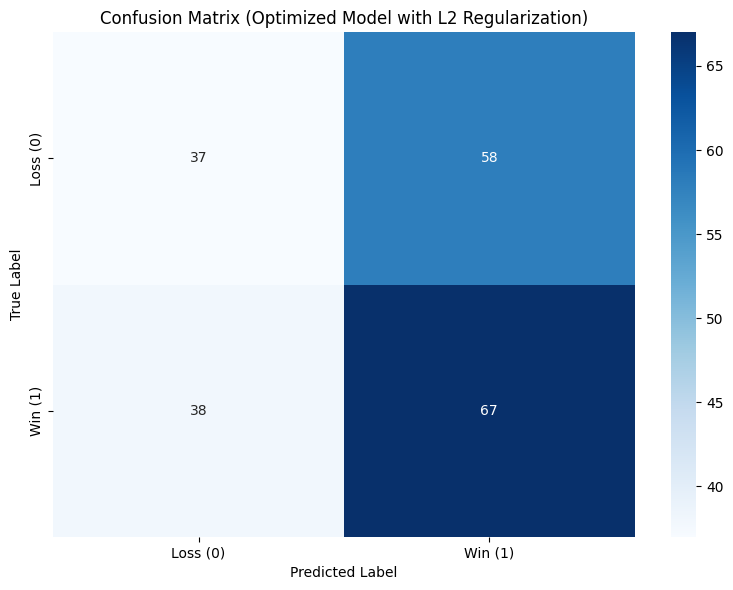


=== Confusion Matrix Breakdown ===
True Negatives (TN): 37 (Correctly predicted Loss)
False Positives (FP): 58 (Incorrectly predicted Win)
False Negatives (FN): 38 (Incorrectly predicted Loss)
True Positives (TP): 67 (Correctly predicted Win)


In [8]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc,
    accuracy_score
)

%matplotlib inline

# Set model to evaluation mode
model_reg.eval()

# Disable gradient computation
with torch.no_grad():
    # Get predictions for test set
    y_test_pred_prob = model_reg(X_test_tensor) 
    y_test_pred_class = (y_test_pred_prob >= 0.5).float() 

# Convert tensors to NumPy arrays
y_test_true = y_test_tensor.numpy().flatten()  # True labels 
y_test_pred = y_test_pred_class.numpy().flatten()  # Predicted labels
y_test_pred_prob = y_test_pred_prob.numpy().flatten()  # Predicted probabilities

# Calculate confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)

# Define class labels (0 = Loss, 1 = Win)
class_labels = ['Loss (0)', 'Win (1)']

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,  # Show numerical values in cells
    fmt='d',     # Format as integers
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels
)
plt.title('Confusion Matrix (Optimized Model with L2 Regularization)', fontsize=12)
plt.xlabel('Predicted Label', fontsize=10)
plt.ylabel('True Label', fontsize=10)
plt.tight_layout()
plt.show()

# Print confusion matrix breakdown
print("\n=== Confusion Matrix Breakdown ===")
print(f"True Negatives (TN): {cm[0,0]} (Correctly predicted Loss)")
print(f"False Positives (FP): {cm[0,1]} (Incorrectly predicted Win)")
print(f"False Negatives (FN): {cm[1,0]} (Incorrectly predicted Loss)")
print(f"True Positives (TP): {cm[1,1]} (Correctly predicted Win)")

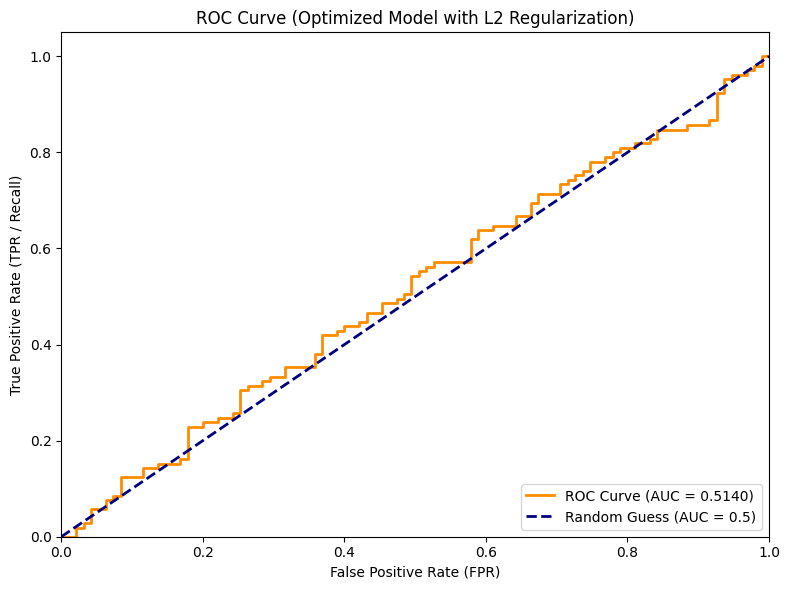


ROC AUC Score: 0.5140


In [9]:
# Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test_true, y_test_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(
    fpr, tpr, 
    color='darkorange', 
    lw=2, 
    label=f'ROC Curve (AUC = {roc_auc:.4f})'
)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curve (Optimized Model with L2 Regularization)', fontsize=12)
plt.xlabel('False Positive Rate (FPR)', fontsize=10)
plt.ylabel('True Positive Rate (TPR / Recall)', fontsize=10)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print(f"\nROC AUC Score: {roc_auc:.4f}")

In [10]:
# Generate classification report
report = classification_report(
    y_test_true, 
    y_test_pred, 
    target_names=class_labels,
    digits=4  # Precision of metrics (4 decimal places)
)

# Print classification report
print("\n=== Classification Report ===")
print(report)


=== Classification Report ===
              precision    recall  f1-score   support

    Loss (0)     0.4933    0.3895    0.4353        95
     Win (1)     0.5360    0.6381    0.5826       105

    accuracy                         0.5200       200
   macro avg     0.5147    0.5138    0.5090       200
weighted avg     0.5157    0.5200    0.5126       200



Double-click <b>here</b> for the Hint.
<!-- 

#Change the name of variables as per your code
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools

# Visualize the confusion matrix
#Change the variable names as used in your code
y_pred_test_labels = (y_pred_test > 0.5).float()
cm = confusion_matrix(y_test, y_pred_test_labels)

plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(2)
plt.xticks(tick_marks, ['Loss', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Win'])

thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred_test_labels, target_names=['Loss', 'Win']))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
-->


### Step 6: Model Saving and Loading  

#### Task 6: Save and load the trained model.  

This task demonstrates the techniques to persist a trained model using `torch.save` and reload it using `torch.load`. Evaluating the loaded model ensures that it retains its performance, making it practical for deployment in real-world applications.  

1. Saving the Model:
- Save the model's learned weights and biases using torch.save().( e.g. , torch.save(model.state_dict(), 'your_model_name.pth'))
- Saving only the state dictionary (model parameters) is preferred because it’s more flexible and efficient than saving the entire model object.

2. Loading the Model:
- Create a new model instance (e.g., `model = LogisticRegressionModel()`) and load the saved parameters. ( e.g. , `model.load_state_dict(torch.load('your_model_name.pth'))`)`.

3. Evaluating the Loaded Model:
   - After loading, set the model to evaluation mode by calling `model.eval()
   - After loading the model, evaluate it again on the test dataset to make sure it performs similarly to when it was first trained..Now evaluate it on the test data.
   - Use `torch.no_grad()` to ensure that no gradients are computed.

#### Exercise 6:  

Write code to save the trained model and reload it. Ensure the loaded model performs consistently by evaluating it on the test dataset.  


In [23]:
## Write your code here
# Save the model
model_save_path = "lol_logistic_regression_l2.pth"   # Define the path to save the model
torch.save(model_reg.state_dict(), model_save_path)
print(f"Model saved successfully to: {model_save_path}")

# Load the model
loaded_model = LogisticRegression(input_dim)   #  Create a new instance of the model
loaded_model.load_state_dict(torch.load(model_save_path))
print(f"Model loaded successfully from: {model_save_path}")

# Ensure the loaded model is in evaluation mode
loaded_model.eval()

# Evaluate the loaded model
with torch.no_grad():
    y_test_pred_prob_loaded = loaded_model(X_test_tensor)
    y_test_pred_class_loaded = (y_test_pred_prob_loaded >= 0.5).float()

# Convert tensors to NumPy arrays
y_test_pred_loaded = y_test_pred_class_loaded.numpy().flatten()

# Calculate key metrics for the loaded model
loaded_test_accuracy = accuracy_score(y_test_true, y_test_pred_loaded)
loaded_roc_auc = auc(*roc_curve(y_test_true, y_test_pred_prob_loaded.numpy().flatten())[:2])

# Compare with the original trained model's metrics
original_test_accuracy = accuracy_score(y_test_true, y_test_pred)
original_roc_auc = auc(fpr, tpr)  # From Exercise 5 (original ROC metrics)

# Print results
print(f"Original Model Test Accuracy: {original_test_accuracy*100:.2f}%")
print(f"Loaded Model Testing Accuracy: {loaded_test_accuracy*100:.2f}%")
print(f"\nOriginal Model ROC AUC: {original_roc_auc*100:.2f}%")
print(f"Loaded Model ROC AUC:   {loaded_roc_auc*100:.2f}%")

Model saved successfully to: lol_logistic_regression_l2.pth
Model loaded successfully from: lol_logistic_regression_l2.pth
Original Model Test Accuracy: 52.00%
Loaded Model Testing Accuracy: 52.00%

Original Model ROC AUC: 51.40%
Loaded Model ROC AUC:   51.40%


### Step 7: Hyperparameter Tuning  

#### Task 7: Perform hyperparameter tuning to find the best learning rate.  

By testing different learning rates, you will identify the optimal rate that provides the best test accuracy. This fine-tuning is crucial for enhancing model performance . 
1. Define Learning Rates:
   - Choose these learning rates to test ,[0.01, 0.05, 0.1]

2. Reinitialize the Model for Each Learning Rate:
  - For each learning rate, you’ll need to reinitialize the model and optimizer e.g.(`torch.optim.SGD(model.parameters(), lr=lr)`).
   - Each new learning rate requires reinitializing the model since the optimizer and its parameters are linked to the learning rate.

3. Train the Model for Each Learning Rate:
  - Train the model for a fixed number of epochs (e.g., 50 or 100 epochs) for each learning rate, and compute the accuracy on the test set.
  - Track the test accuracy for each learning rate and identify which one yields the best performance.

4. Evaluate and Compare:
  - After training with each learning rate, compare the test accuracy for each configuration.
   - Report the learning rate that gives the highest test accuracy

#### Exercise 7:  

Perform hyperparameter tuning to find the best learning rate. Retrain the model for each learning rate and evaluate its performance to identify the optimal rate.  


In [41]:
## Write your code here
# Define hyperparameters for tuning
learning_rates = [0.01, 0.05, 0.1]  # Learning rates to test
num_epochs = 100  
weight_decay = 0.01  
input_dim = X_train_tensor.shape[1] 

# Initialize storage for results
tuning_results = {
    "lr": [],
    "final_train_loss": [],
    "test_accuracy": [],
    "train_loss_history": []  # Track loss over epochs for each LR
}

print("=== Starting Hyperparameter Tuning (Learning Rate) ===")
for lr in learning_rates:
    print(f"\nTraining model with Learning Rate = {lr}...")
    
    # 1. Reinitialize model
    model_tune = LogisticRegression(input_dim)
    
    # 2. Initialize optimizer
    optimizer_tune = optim.SGD(model_tune.parameters(), lr=lr, weight_decay=weight_decay)
    
    # 3. Loss function
    criterion_tune = nn.BCELoss()
    
    # 4. Training loop
    train_losses = []
    for epoch in range(1, num_epochs+1):
        model_tune.train()
        optimizer_tune.zero_grad()
        
        # Forward pass
        y_train_pred = model_tune(X_train_tensor)
        loss = criterion_tune(y_train_pred, y_train_tensor)
        
        # Backpropagation + optimization
        loss.backward()
        optimizer_tune.step()
        
        # Track loss
        train_losses.append(loss.item())
        
        # Print progress every 10 epochs
        if epoch % 10 == 0:
            print(f"  Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
    
    # Evaluate test accuracy for current LR
    model_tune.eval()
    with torch.no_grad():
        y_test_pred_prob = model_tune(X_test_tensor)
        y_test_pred_class = (y_test_pred_prob >= 0.5).float()
        y_test_pred = y_test_pred_class.numpy().flatten()
        test_acc = accuracy_score(y_test_true, y_test_pred)
    
    # Store results for current LR
    tuning_results["lr"].append(lr)
    tuning_results["final_train_loss"].append(train_losses[-1])
    tuning_results["test_accuracy"].append(test_acc)
    tuning_results["train_loss_history"].append(train_losses)

# Print raw tuning results
print("\n=== Hyperparameter Tuning Results (Raw) ===")
for i, lr in enumerate(learning_rates):
    print(f"Learning Rate = {lr}: Test Accuracy = {tuning_results['test_accuracy'][i]:.4f} (Final Train Loss = {tuning_results['final_train_loss'][i]:.4f})")

# Find index of maximum test accuracy
best_idx = np.argmax(tuning_results["test_accuracy"])
best_lr = tuning_results["lr"][best_idx]
best_test_acc = tuning_results["test_accuracy"][best_idx]

# Print optimal results
print("\n=== Optimal Learning Rate Identified ===")
print(f"Best Learning Rate: {best_lr}")
print(f"Test Accuracy with Best LR: {best_test_acc:.4f} ({best_test_acc*100:.2f}%)")

=== Starting Hyperparameter Tuning (Learning Rate) ===

Training model with Learning Rate = 0.01...
  Epoch [11/100], Loss: 0.7678
  Epoch [21/100], Loss: 0.7643
  Epoch [31/100], Loss: 0.7610
  Epoch [41/100], Loss: 0.7577
  Epoch [51/100], Loss: 0.7546
  Epoch [61/100], Loss: 0.7516
  Epoch [71/100], Loss: 0.7488
  Epoch [81/100], Loss: 0.7460
  Epoch [91/100], Loss: 0.7433
  Epoch [101/100], Loss: 0.7408

Training model with Learning Rate = 0.05...
  Epoch [11/100], Loss: 0.7462
  Epoch [21/100], Loss: 0.7327
  Epoch [31/100], Loss: 0.7220
  Epoch [41/100], Loss: 0.7136
  Epoch [51/100], Loss: 0.7071
  Epoch [61/100], Loss: 0.7020
  Epoch [71/100], Loss: 0.6981
  Epoch [81/100], Loss: 0.6951
  Epoch [91/100], Loss: 0.6928
  Epoch [101/100], Loss: 0.6910

Training model with Learning Rate = 0.1...
  Epoch [11/100], Loss: 0.7114
  Epoch [21/100], Loss: 0.7016
  Epoch [31/100], Loss: 0.6953
  Epoch [41/100], Loss: 0.6914
  Epoch [51/100], Loss: 0.6890
  Epoch [61/100], Loss: 0.6875
  E

### Step 8: Feature Importance  

#### Task 8: Evaluate feature importance to understand the impact of each feature on the prediction.  

The code to evaluate feature importance to understand the impact of each feature on the prediction.

 1.Extracting Model Weights:
  - The weights of the logistic regression model represent the importance of each feature in making predictions. These weights are stored in the model's linear layer (`model.linear.weight`).
 - You can extract the weights using `model.linear.weight.data.numpy()` and flatten the resulting tensor to get a 1D array of feature importances.

2.Creating a DataFrame:
 - Create a pandas DataFrame with two columns: one for the feature names and the other for their corresponding importance values (i.e., the learned weights).
 - Ensure the features are aligned with their names in your dataset (e.g., `X_train.columns).

3. Sorting and Plotting Feature Importance:
  - Sort the features based on the absolute value of their importance (weights) to identify the most impactful features.
  - Use a bar plot (via `matplotlib`) to visualize the sorted feature importances, with the feature names on the y-axis and importance values on the x-axis.

4. Interpreting the Results:
  - Larger absolute weights indicate more influential features. Positive weights suggest a positive correlation with the outcome (likely to predict the positive class), while negative weights suggest the opposite.

#### Exercise 8:  

Evaluate feature importance by extracting the weights of the linear layer and creating a DataFrame to display the importance of each feature. Visualize the feature importance using a bar plot.  


In [53]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the weights of the linear layer
## Write your code here
feature_weights = model_tune.linear.weight.data.numpy().flatten()

# Get feature names
feature_names = X_train.columns.tolist()

In [56]:
# Create a DataFrame for feature importance
## Write your code here
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (Weight)': feature_weights,
    'Absolute Importance': np.abs(feature_weights)  # For sorting by impact
})

# Sort features by ABSOLUTE importance (descending) to highlight top influencers
feature_importance_df = feature_importance_df.sort_values(
    by='Absolute Importance', 
    ascending=False
).reset_index(drop=True)

# Print the top 10 most important features (and full list)
print("=== Top 10 Most Important Features (Sorted by Absolute Weight) ===")
print(feature_importance_df.head(10))

print("\n=== Full Feature Importance List ===")
print(feature_importance_df)

=== Top 10 Most Important Features (Sorted by Absolute Weight) ===
        Feature  Importance (Weight)  Absolute Importance
0   gold_earned             0.189712             0.189712
1         kills             0.129032             0.129032
2  wards_placed             0.086088             0.086088
3       assists            -0.037330             0.037330
4            cs            -0.028918             0.028918
5  damage_dealt            -0.027559             0.027559
6        deaths            -0.020472             0.020472
7  wards_killed            -0.011019             0.011019

=== Full Feature Importance List ===
        Feature  Importance (Weight)  Absolute Importance
0   gold_earned             0.189712             0.189712
1         kills             0.129032             0.129032
2  wards_placed             0.086088             0.086088
3       assists            -0.037330             0.037330
4            cs            -0.028918             0.028918
5  damage_dealt          

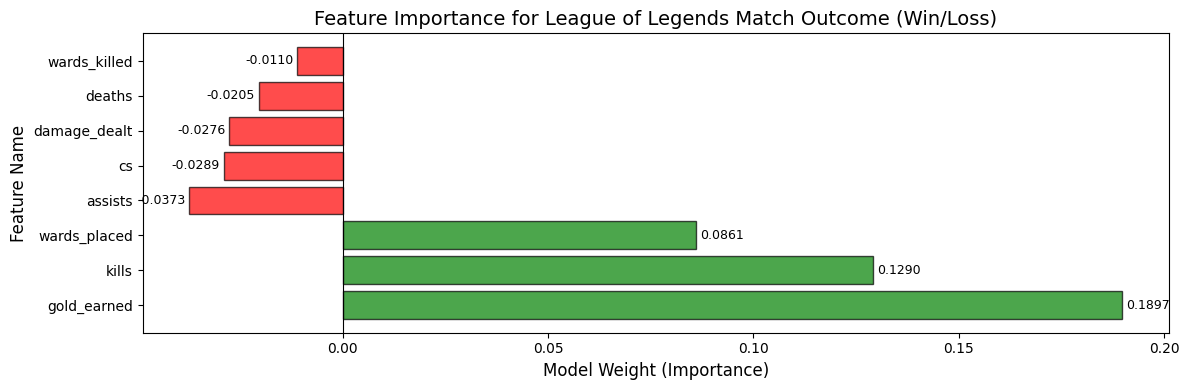

In [71]:
# Plotting Feature Importance
plt.figure(figsize=(12, len(feature_importance_df)*0.5))

# Assign colors: positive weights (green = increases win probability), negative (red = decreases)
colors = ['green' if w > 0 else 'red' for w in feature_importance_df['Importance (Weight)']]

# Create horizontal bar plot
bars = plt.barh(
    y=feature_importance_df['Feature'],
    width=feature_importance_df['Importance (Weight)'], 
    color=colors,
    edgecolor='black',
    alpha=0.7
)

# Add labels/title
plt.title('Feature Importance for League of Legends Match Outcome (Win/Loss)', fontsize=14)
plt.xlabel('Model Weight (Importance)', fontsize=12)
plt.ylabel('Feature Name', fontsize=12)

# Add value labels to bars (for clarity)
for bar in bars:
    width = bar.get_width()
    label_x = width + 0.001 if width > 0 else width - 0.001
    plt.text(
        x=label_x,
        y=bar.get_y() + bar.get_height()/2,
        s=f"{width:.4f}",
        va='center',
        ha='left' if width > 0 else 'right',
        fontsize=9
    )

# Add a vertical line at x=0 (baseline)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

In [77]:
# Interpret Feature Importance 
top_positive_feature = feature_importance_df.loc[feature_importance_df['Importance (Weight)'].idxmax()]
top_negative_feature = feature_importance_df.loc[feature_importance_df['Importance (Weight)'].idxmin()]

print("\n=== Feature Importance Interpretation ===")
print(f"Most Impactful Feature for Winning: '{top_positive_feature['Feature']}' (Weight = {top_positive_feature['Importance (Weight)']:.4f})")
print(f"   This feature STRONGLY increases the probability of predicting a win.")

print(f"\nMost Impactful Feature for Losing: '{top_negative_feature['Feature']}' (Weight = {top_negative_feature['Importance (Weight)']:.4f})")
print(f"   This feature STRONGLY increases the probability of predicting a loss.")

print(f"\nNeutral Features: Features with weights near 0 (e.g., '{feature_importance_df.loc[feature_importance_df['Absolute Importance'].idxmin()]['Feature']}' with weight = {feature_importance_df.loc[feature_importance_df['Absolute Importance'].idxmin()]['Importance (Weight)']:.4f})")
print(f"   These features have little to no impact on match outcome predictions.")


=== Feature Importance Interpretation ===
Most Impactful Feature for Winning: 'gold_earned' (Weight = 0.1897)
   This feature STRONGLY increases the probability of predicting a win.

Most Impactful Feature for Losing: 'assists' (Weight = -0.0373)
   This feature STRONGLY increases the probability of predicting a loss.

Neutral Features: Features with weights near 0 (e.g., 'wards_killed' with weight = -0.0110)
   These features have little to no impact on match outcome predictions.


Double-click <b>here</b> for the Hint
<!-- 
#Use the following code to extract the weight and create dataframe
#Change the name of variables per your code

Extract the weights of the linear layer:
weights = model.linear.weight.data.numpy().flatten()
features = X.columns
Create a DataFrame for feature importance:
feature_importance = pd.DataFrame({'Feature': features, 'Importance': weights})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)
Plot feature importance plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()
-->


#### Conclusion:  

Congratulations on completing the project! In this final project, you built a logistic regression model to predict the outcomes of League of Legends matches based on various in-game statistics. This comprehensive project involved several key steps, including data loading and preprocessing, model implementation, training, optimization, evaluation, visualization, model saving and loading, hyperparameter tuning, and feature importance analysis. This project provided hands-on experience with the complete workflow of developing a machine learning model for binary classification tasks using PyTorch.

© Copyright IBM Corporation. All rights reserved.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=07c49a60-ff4e-4d04-8add-d3d4206560e6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>